# Predict Car's Market Price

## 1. Introduction to Dataset

Dalam project ini kita akan mencoba memprediksi harga pasar sebuah mobil dari berbagai atribut yang dimilikinya. Dataset yang akan kita gunakan mempunyai informasi teknis masing-masing mobil. Untuk penjelasan dataset lebih lengkap dapat dilihat [disini](https://archive.ics.uci.edu/ml/datasets/automobile)

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
#Memakai kolom yang bernilai kontinu
features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = cars[features]
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# 2. Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [4]:
data = data.replace('?',np.nan)
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [6]:
data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
#Menghilangkan data null pada kolom price karena kita ingin memprediksi kolom itu
data = data.dropna(subset=['price'])
data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
#Mereplace null value di data dengan mean masing-masing kolom
data = data.fillna(data.mean())
data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
#Normalize kolom2 selain kolom price
price = data['price']
data = (data-data.mean())/data.std()
data['price'] = price
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


# 3. Univariate Model

In [64]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    kf = KFold(5,shuffle=True,random_state=1)
    mse = cross_val_score(knn,df[train_col],df[target_col],scoring='neg_mean_squared_error',cv=kf)
    avg_rmse = np.mean(np.sqrt(np.abs(mse)))
    return avg_rmse


In [11]:
data.columns.tolist()

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [65]:
rmse_cols = {}
for col in data.columns.drop('price').tolist():
    rmse_cols[col] = knn_train_test([col],'price',data)
rmse_cols

{'normalized-losses': 7095.507625709315,
 'wheel-base': 6028.665651194356,
 'length': 5663.368427482166,
 'width': 4268.079722169978,
 'height': 7599.242213250058,
 'curb-weight': 4312.246802669906,
 'engine-size': 3191.8329775367115,
 'bore': 6893.4125273104455,
 'stroke': 7077.7115800881675,
 'compression-rate': 6340.700506617709,
 'horsepower': 3791.305719968983,
 'peak-rpm': 7494.098492564672,
 'city-mpg': 4445.030818499132,
 'highway-mpg': 4140.2917258705975}

In [55]:
def knn_train_test_k(train_col,target_col,df,k_neighbors):
    k_mse={}
    for k in k_neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)
        kf = KFold(5,shuffle=True,random_state=1)
        mse = cross_val_score(knn,df[train_col],df[target_col],scoring='neg_mean_squared_error',cv=kf)
        avg_rmse = np.mean(np.sqrt(np.abs(mse)))
        k_mse[k] = avg_rmse
    return k_mse

In [56]:
rmse_k_cols = {}
k_neighbors=[1,3,5,7,9]
for col in data.columns.drop('price').tolist():
    rmse_k_cols[col] = knn_train_test_k([col],'price',data,k_neighbors)
rmse_k_cols

{'normalized-losses': {1: 8742.025180322587,
  3: 6966.119913566826,
  5: 7095.507625709315,
  7: 7511.2911607101805,
  9: 7711.742253795807},
 'wheel-base': {1: 4243.639928884716,
  3: 5071.662902314459,
  5: 6028.665651194356,
  7: 6118.589214635821,
  9: 6182.110558966602},
 'length': {1: 4881.922536998683,
  3: 5522.40066414928,
  5: 5663.368427482166,
  7: 5560.880571230129,
  9: 5600.679883790164},
 'width': {1: 5110.308191770663,
  3: 4066.509393764323,
  5: 4268.079722169978,
  7: 4631.9070225461355,
  9: 4577.0017880566475},
 'height': {1: 9267.972331603416,
  3: 7577.75231284287,
  5: 7599.242213250058,
  7: 7553.842874680279,
  9: 7595.713359251711},
 'curb-weight': {1: 5263.210350129792,
  3: 4686.002186106076,
  5: 4312.246802669906,
  7: 4047.523166566078,
  9: 3977.0983239890484},
 'engine-size': {1: 3548.02318885446,
  3: 3069.094586103613,
  5: 3191.8329775367115,
  7: 3424.569552452859,
  9: 3534.9051444858183},
 'bore': {1: 8704.760007703995,
  3: 6631.371348737125,


In [57]:
#Buat dataframe dari dictionary rmse diatas
test = {'col':['test'],'k':['test'],'values':['test']}
df = pd.DataFrame(data=test)
for i in list(rmse_k_cols.keys()):
    rmse = rmse_k_cols[i]
    val = []
    keys = list(rmse.keys())
    #keys = keys.sort()
    #print(keys)
    for key in keys:
        #print(key)
        val.append(rmse[key])
        #print(val)
    col = {'col':[i,i,i,i,i],'k':keys , 'values':val}
    df1 = pd.DataFrame(data=col)
    df = pd.concat([df,df1])
df = df.reset_index(drop=True)
df=df.drop([0])
df['k'] = df['k'].astype('float')
df['values'] = df['values'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     70 non-null     object 
 1   k       70 non-null     float64
 2   values  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


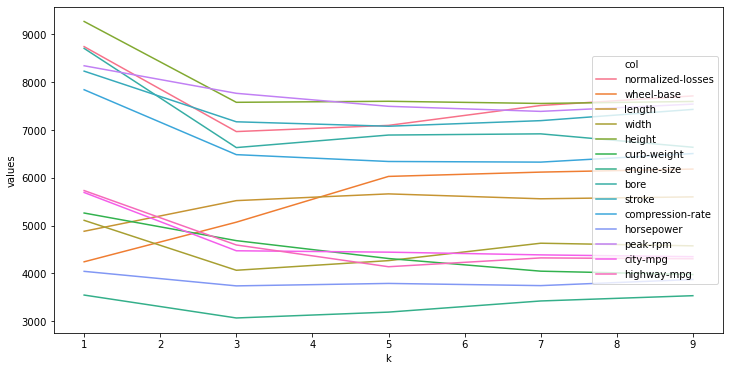

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.lineplot(x='k',y='values',hue='col', data=df)
plt.legend(loc='right')

# 4.Multi Variate Model

In [59]:
#Menggunakan nilai rmse dari univariate sebelumnya
avg_rmse = {}
for key in rmse_k_cols.keys():
    arr = rmse_k_cols[key]
    values = np.mean(list(arr.values()))
    avg_rmse[key] = values
series_avg_rmse = pd.Series(avg_rmse)
series_avg_rmse = series_avg_rmse.sort_values()
series_avg_rmse

engine-size          3353.685090
horsepower           3838.991871
curb-weight          4457.216166
width                4530.761224
highway-mpg          4620.035296
city-mpg             4670.004880
length               5445.850417
wheel-base           5528.933651
compression-rate     6699.775348
bore                 7157.259626
stroke               7420.334283
normalized-losses    7605.337227
peak-rpm             7706.033272
height               7918.904618
dtype: float64

In [66]:
n_features_rmse = {}
for i in range (2,6):
    cols = str(i)+'_features'
    features = series_avg_rmse[:i].index.tolist()
    n_features_rmse[cols] = knn_train_test(features,'price',data)
series_n_features = pd.Series(n_features_rmse)
series_n_features

2_features    2984.228512
3_features    3094.124703
4_features    3053.388609
5_features    3103.534082
dtype: float64

# 5. Hyperparameter Optimization

In [59]:
#Menggunakan nilai rmse dari univariate sebelumnya
avg_rmse = {}
for key in rmse_k_cols.keys():
    arr = rmse_k_cols[key]
    values = np.mean(list(arr.values()))
    avg_rmse[key] = values
series_avg_rmse = pd.Series(avg_rmse)
series_avg_rmse = series_avg_rmse.sort_values()
series_avg_rmse

engine-size          3353.685090
horsepower           3838.991871
curb-weight          4457.216166
width                4530.761224
highway-mpg          4620.035296
city-mpg             4670.004880
length               5445.850417
wheel-base           5528.933651
compression-rate     6699.775348
bore                 7157.259626
stroke               7420.334283
normalized-losses    7605.337227
peak-rpm             7706.033272
height               7918.904618
dtype: float64

In [67]:
#Mencoba hyperparameter dari 1-25
n_features_rmse = {}
for i in range (2,6):
    cols = str(i)+'_features'
    features = series_avg_rmse[:i].index.tolist()
    n_features_rmse[cols] = knn_train_test_k(features,'price',data,[i for i in range(1,26)])
series_n_features = pd.Series(n_features_rmse)
series_n_features

2_features    {1: 3023.7609640378823, 2: 2707.8442307321407,...
3_features    {1: 2751.9530344221116, 2: 2934.4269647484925,...
4_features    {1: 2716.5292261145178, 2: 2683.375237398058, ...
5_features    {1: 2651.0336101905423, 2: 2665.1353985683213,...
dtype: object

In [69]:
#Buat dataframe dari dictionary rmse diatas
test = {'col':['test'],'k':['test'],'values':['test']}
df = pd.DataFrame(data=test)
for i in list(n_features_rmse.keys()):
    rmse = n_features_rmse[i]
    val = []
    keys = list(rmse.keys())
    cols=[]
    #print(keys)
    for key in keys:
        cols.append(i)
        val.append(rmse[key])
    col = {'col':cols,'k':keys , 'values':val}
    df1 = pd.DataFrame(data=col)
    df = pd.concat([df,df1])
df = df.reset_index(drop=True)
df=df.drop([0])
df['k'] = df['k'].astype('float')
df['values'] = df['values'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     100 non-null    object 
 1   k       100 non-null    float64
 2   values  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [68]:
n_features_rmse

{'2_features': {1: 3023.7609640378823,
  2: 2707.8442307321407,
  3: 2849.1415350093657,
  4: 2920.6113884663,
  5: 2984.2285120441256,
  6: 2997.6287442932417,
  7: 3167.8296778877166,
  8: 3260.9648048544964,
  9: 3344.2478958096826,
  10: 3479.4949719699507,
  11: 3586.9657196122744,
  12: 3699.9352767309842,
  13: 3816.4652800530594,
  14: 3916.38629696929,
  15: 3942.261589283857,
  16: 3989.3104727530945,
  17: 4078.1562596173744,
  18: 4140.138331785029,
  19: 4189.308293545596,
  20: 4245.092577237888,
  21: 4343.355633581312,
  22: 4404.6708037715225,
  23: 4458.56763560855,
  24: 4514.603790759873,
  25: 4550.51185703278},
 '3_features': {1: 2751.9530344221116,
  2: 2934.4269647484925,
  3: 2958.306127185603,
  4: 2898.715662129486,
  5: 3094.1247034627704,
  6: 3257.517132107776,
  7: 3208.7421416167354,
  8: 3283.731327570399,
  9: 3340.0418206535055,
  10: 3421.6792609647973,
  11: 3512.946006441245,
  12: 3569.5903267371773,
  13: 3644.053542111235,
  14: 3678.91795782452

<AxesSubplot:xlabel='k', ylabel='values'>

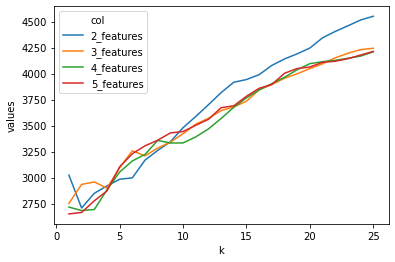

In [75]:
sns.lineplot(x='k',y='values',hue='col',data=df)